<a href="https://colab.research.google.com/github/Yash-Bandal/ATM_Working/blob/main/NormalDistribution_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**What Is a Statistical Distribution?**


The probability distribution derives from variance. If both you and I flipped 10 coins, it’s pretty likely that we would get different results (you might get 5 heads and I get 7). This variance, a.k.a. uncertainty around the outcome, produces a probability distribution, which basically tells us what outcomes are relatively more likely (such as 5 heads) and which outcomes are relatively less likely (such as 10 heads).
So each set of 10 coin flips is like a random variable. We don’t know beforehand exactly how many heads we will get. But if we know its distribution, then we know which outcomes are probable and which are not. And that’s basically what any statistical distribution tells us — it’s a graph that tells us how likely it is to get each of the possible results.
Or another way to think about it, it is what the distribution of outcomes would converge to if we ran an experiment with an uncertain outcome over and over again (collecting the results each time).

**The Normal Distribution**

Now let’s return to the normal distribution. A normally distributed random variable might have a mean of 0 and a standard deviation of 1. What does that mean? That means that we expect the value to be 0 (on average) but the actual realized values of our random variable wiggle around 0. The amount that it wiggles by is 1. I’ve plotted a normal distribution below. The higher the blue line is in the plot, the higher the frequency of seeing that value below it on the x-axis. Notice how a value of 3 or more is extremely unlikely. That’s because our normally distributed random variable has a wiggle amount (standard deviation) of 1, and 3 is three standard deviations away from the mean 0 (really far!)


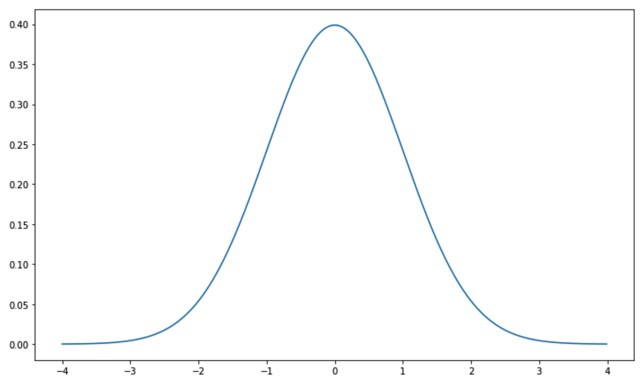

So the individual instances that combine to make the normal distribution are like the outcomes from a random number generator — a random number generator that can theoretically take on any value between negative and positive infinity but that has been preset to be centered around 0 and with most of the values occurring between -1 and 1 (because the standard deviation is 1).

**Why Is It Useful?**


Seems simple enough right? The normal distribution just tells us what the outcomes of running a random number generator (with the above mentioned preset characteristics) many, many times would look like.
So why is this useful? That’s because many real world phenomena conform to the normal distribution. For example, people’s heights are famously normally distributed. If you survey the heights of 5 of your friends, you will get a wonky looking distribution. But as you increase the number of friends sampled (e.g. all your Facebook friends, assuming you are reasonably social), the distribution will start looking more and more like a normal distribution.
In the corporate world, the distribution of the severity of manufacturing defects was found to be normally distributed (this makes sense: usually you make it right, a few times you make it slightly wrong, and once in a blue moon you completely mess it up) — in fact, the process improvement framework Six Sigma was basically built around this observation.
In the investment world, the periodic (daily, monthly, even annual) returns of assets like stocks and bonds are assumed to follow a normal distribution. Making this assumption probably understates the likelihood and therefore risk of fat tails (severe market crashes occur more frequently than the models tell us they should), but that is a discussion for another day.
In data science and statistics, statistical inference (and hypothesis testing) relies heavily on the normal distribution. Since we like data science, let’s explore this particular application in more depth.

**The Volatility of the Mean**


When I first learned statistics, I was confused by standard error. I thought, “why do they sometimes call it standard deviation and other times standard error?” Only later did I learn that standard error actually refers to the volatility (standard deviation) of the mean.
Why does the mean vary? We are used to thinking of the mean, the expected value of something, as a static value. You take all the heights, divide it by the number of heights, and you get the mean (average) height. This is the expected value. If someone were to ask you to guess (and you can’t give your guess as a range) the height of a person based on no prior information at all, you would guess the mean (that’s why we call it the expected value).
But the mean itself is actually a random variable. That’s because our average height is based on a sample — it would be impossible to sample the entire population (everyone in the world), so no matter how large our height study might be, it would still be a sample.
So even if we try to be unbiased and pick each sample in a way that is representative of the population, every time we take a new sample, the average calculated from that sample will be a bit different from the prior ones. That’s annoying. If we can’t be certain of the value, then how can we do anything with it? For example, say our friend asked us:
“Is the average height of a person greater than 6 feet.”
So we get to work and obtain some data (by conducting a quick survey of 10 people standing around us) and calculate the average of our sample to be 5 feet 9 inches. But then we tell our friend, “I don’t know, my sample mean is lower than 6 feet but at the end of the day it might be higher or it might be lower. The mean itself bounces around depending on the sample, so nobody really knows.” That’s not very helpful (and extremely indecisive). After a while, nobody would ask for our insight anymore.
This is where the normal distribution comes in — the mean of our sample means is itself a normally distributed random variable. Meaning that if we took a large enough number of samples and calculated the mean for each one, the distribution of those means would be shaped just like the normal distribution. This allows us to make inferences about the overall population even from relatively small samples — meaning from just a few observations, we can learn a great deal about the statistical characteristics of the overall population.
In our previous example, the normally distributed random variable had a mean of 0 and a standard deviation of 1. But the mean and standard deviation can be whatever we need it to be. Let’s use some Python code to check out how the normal distribution can help us deliver a better answer to our friend.


**How to Calculate Skewness & Kurtosis in Python**

In statistics, skewness and kurtosis are two ways to measure the shape of a distribution.

Skewness is a measure of the asymmetry of a distribution. This value can be positive or negative.

A negative skew indicates that the tail is on the left side of the distribution, which extends towards more negative values.
A positive skew indicates that the tail is on the right side of the distribution, which extends towards more positive values.
A value of zero indicates that there is no skewness in the distribution at all, meaning the distribution is perfectly symmetrical.
Kurtosis is a measure of whether or not a distribution is heavy-tailed or light-tailed relative to a normal distribution.

The kurtosis of a normal distribution is 3.
If a given distribution has a kurtosis less than 3, it is said to be playkurtic, which means it tends to produce fewer and less extreme outliers than the normal distribution.
If a given distribution has a kurtosis greater than 3, it is said to be leptokurtic, which means it tends to produce more outliers than the normal distribution.

>



Now let’s generate some data. We will assume that the true mean height of a person is 5 feet 6 inches and the true standard deviation is 1 foot (12 inches). We also define a variable called “target” of 6 feet, which is the height that our friend inquired about. To make life easier, we will convert everything to inches.

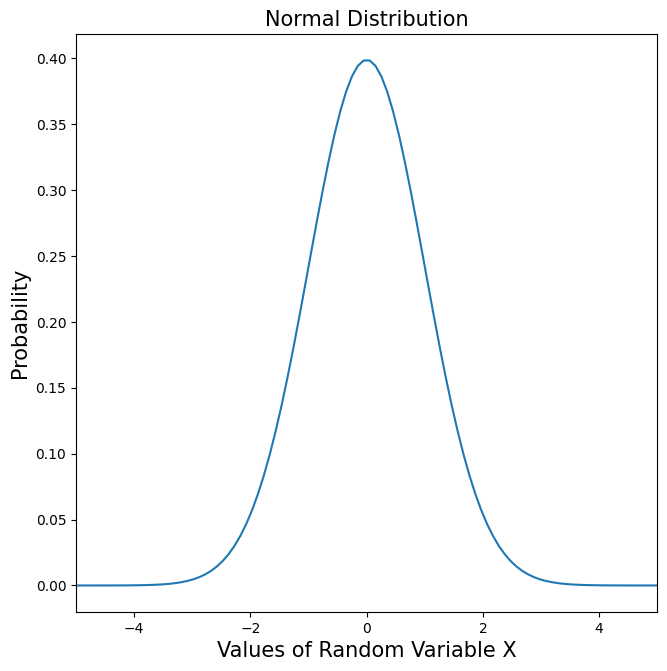

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
#
# Create a standard normal distribution with mean as 0 and standard deviation as 1
#
mu = 0
std = 1
snd = stats.norm(mu, std)
#
# Generate 100 random values between -5, 5
#
x = np.linspace(-5, 5, 100)
#
# Plot the standard normal distribution for different values of random variable
# falling in the range -5, 5
#
plt.figure(figsize=(7.5,7.5))
plt.plot(x, snd.pdf(x))
plt.xlim(-5, 5)
plt.title('Normal Distribution', fontsize='15')
plt.xlabel('Values of Random Variable X', fontsize='15')
plt.ylabel('Probability', fontsize='15')
plt.show()

Normal distribution is a symmetric probability distribution with equal number of observations on either half of the mean.
The parameters representing the shape and probabilities of the normal distribution are mean and standard deviation
Python Scipy stats module can be used to create a normal distribution with meand and standard deviation parameters using method norm.
Standard normal distribution is normal distribution with mean as 0 and standard deviation as 1.
In normal distribution, 68% of observations lie within 1 standard deviation, 95% of observations lie within 2 standard deviations and 99.7% observations lie within 3 standard deviations from the mean.

In [ ]:
#https://www.codespeedy.com/how-to-find-skewness-of-data-using-python/


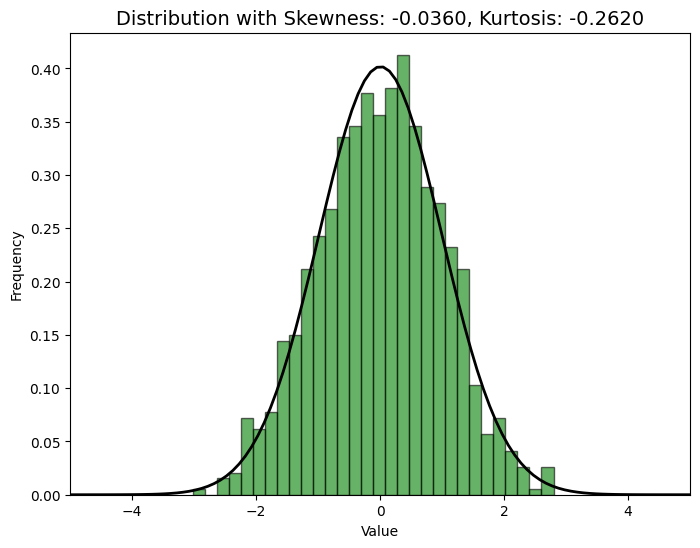

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Generate random data (with known skewness and kurtosis)
data = np.random.normal(0, 1, 1000)  # Standard normal distribution

# Calculate skewness and kurtosis
skewness = stats.skew(data)
kurtosis = stats.kurtosis(data, fisher=True)

# Plot histogram of the data
plt.figure(figsize=(8, 6))
plt.hist(data, bins=30, density=True, alpha=0.6, color='g', edgecolor='black')

# Plot the normal distribution curve for comparison
plt.xlim(-5,5)
x = np.linspace(-5, 5, 100)
p = stats.norm.pdf(x, np.mean(data), np.std(data))
plt.plot(x, p, 'k', linewidth=2)

# Display skewness and kurtosis on the plot
plt.title(f"Distribution with Skewness: {skewness:.4f}, Kurtosis: {kurtosis:.4f}", fontsize=14)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()
